In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

def norm_l():
    norm_l = tf.keras.layers.Normalization(axis=-1)
    return norm_l
#importing mnist dataset
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#normalizing the data
norm_l=norm_l()
# x_train,x_test=norm_l(x_train),norm_l(x_test)
x_train, x_test = x_train / 255.0, x_test / 255.0
# Reshape the data to fit the model input
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

#creating the model
# model=Sequential([Dense(25,activation='relu'),Dense(15,activation='relu'),Dense(10,activation='softmax')])

model=Sequential([Dense(25,activation='relu'),Dense(15,activation='relu'),Dense(10,activation='linear')])

#compiling the model

model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer='adam')


#model fitting
model.fit(x_train,y_train,epochs=100)
softmaxit = model(x_train)
#model prediction
fx=tf.nn.softmax(softmaxit)

#print category of the images based on the highest probability
# Make predictions on the test data
predictions = model.predict(x_test)
softmaxit = model(x_test)
fx=tf.nn.softmax(softmaxit)

# # Convert the predictions to class labels
# predicted_labels = np.argmax(predictions, axis=1)

# # Print the first 10 predicted labels
# print(predicted_labels[:10])
#First calculate index of the highest probability
category=np.argmax(fx,axis=1)

print(category)
# print(fx[-1,:])  # Fix: Replace "fx[end,:]" with "fx[-1,:]"
# print(fx.shape)

#plotting the model
# tf.keras.utils.plot_model(model, to_file='model.png')
import matplotlib.pyplot as plt

# Choose a sample index to visualize
sample_index = x_test[-1]  # You can change this to any valid index



2024-03-12 10:41:32.060847: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-12 10:41:32.085126: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 10:41:32.183696: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 10:41:32.183737: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 10:41:32.197124: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Epoch 1/100
1875/1875 [==============================] - 1s 615us/step - loss: 0.4073
Epoch 2/100
1875/1875 [==============================] - 1s 589us/step - loss: 0.2042
Epoch 3/100
1875/1875 [==============================] - 1s 564us/step - loss: 0.1636
Epoch 4/100
1875/1875 [==============================] - 1s 578us/step - loss: 0.1395
Epoch 5/100
1875/1875 [==============================] - 1s 559us/step - loss: 0.1235
Epoch 6/100
1875/1875 [==============================] - 1s 572us/step - loss: 0.1121
Epoch 7/100
1875/1875 [==============================] - 1s 583us/step - loss: 0.1038
Epoch 8/100
1875/1875 [==============================] - 1s 577us/step - loss: 0.0972
Epoch 9/100
1875/1875 [==============================] - 1s 573us/step - loss: 0.0894
Epoch 10/100
1875/1875 [==============================] - 1s 573us/step - loss: 0.0856
Epoch 11/100
1875/1875 [==============================] - 1s 555us/step - loss: 0.0797
Epoch 12/100
1875/1875 [============================

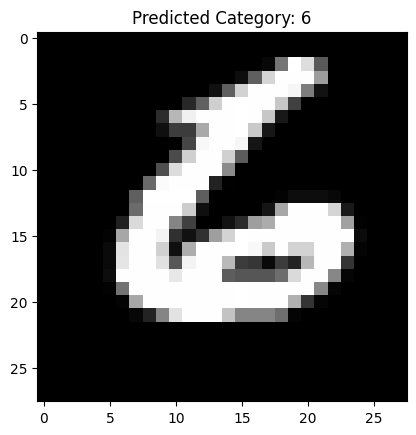

In [2]:
# Reshape the image back to 28x28 for visualization
image = x_test[-1].reshape(28, 28)

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f'Predicted Category: {category[-1]}')
plt.show()



1/1 [==============================] - 0s 13ms/step
The model predicts this is a: 3
[[-11.60078    -9.310651    0.5787074  21.807985  -37.168194    8.52931
  -10.363304  -17.374935    4.961561  -15.332141 ]]


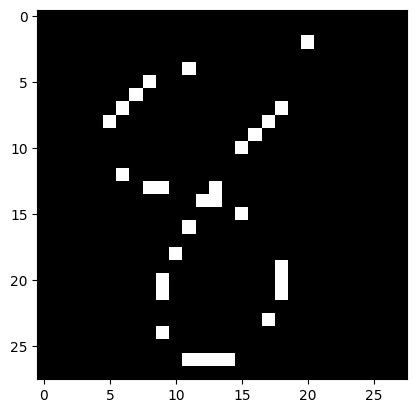

In [8]:
# Use the model to make predictions on images taken with your phone

# Load the image
from tensorflow.keras.preprocessing import image
# Load the image
image_path = '../../../Data/mymnist/eight.png'
img = image.load_img(image_path, target_size=(28, 28), color_mode="grayscale")
#make negative of the image

# Resize and invert the image
img_array = image.img_to_array(img)
# img_array = 255 - img_array

# Normalize and reshape the image
img_array = img_array / 255.0
img_array = img_array.reshape((1, 28*28))

prediction_iphone = model.predict(img_array)
predicted_class = np.argmax(prediction_iphone, axis=1)
print(f"The model predicts this is a: {predicted_class[0]}")
print(prediction_iphone)


plt.imshow(img_array.reshape(28, 28), cmap='gray')